In [3]:
#import the basic library functions

In [4]:
import pandas as pd 
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [6]:
data=pd.read_csv('50_Startups1.csv')#read the file which the mlr is to to be done 
data

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
data.info()# gives the basic information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RandD_Spend      50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
data.describe()#gives the values of the buisness decisions 

,RandD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# checking for the outliers

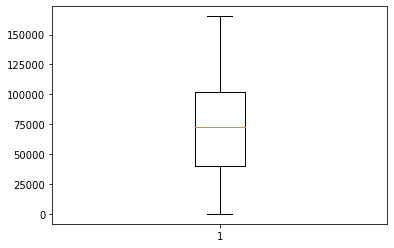

In [10]:
plt.boxplot(data.RandD_Spend)
plt.show()

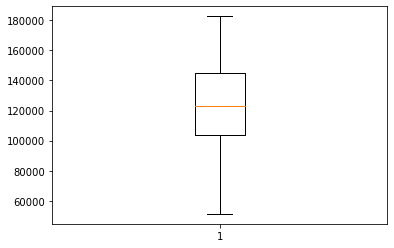

In [11]:
plt.boxplot(data.Administration)
plt.show()

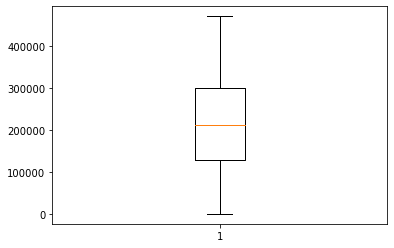

In [12]:
plt.boxplot(data.Marketing_Spend)
plt.show()

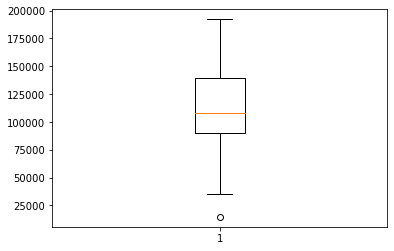

In [13]:
plt.boxplot(data.Profit)
plt.show()

In [14]:
data.corr()## for finding the correlation between the variables

,RandD_Spend,Administration,Marketing_Spend,Profit
RandD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


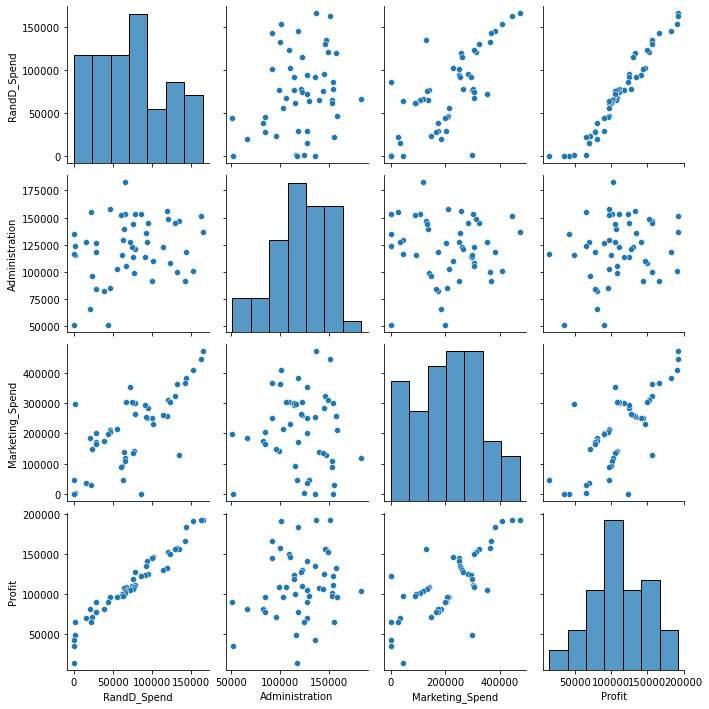

In [15]:
sns.pairplot(data)

# model1

In [16]:
model1=smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend',data=data).fit()

In [17]:
model1.params

Intercept          50122.192990
RandD_Spend            0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           4.53e-30
Time:                        14:35:54   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD_Spend         0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
predict1=model1.predict()
predict1

array([192521.25289008, 189156.76823226, 182147.2790962 , 173696.70002553,
       172139.51418327, 163580.7805712 , 158114.09666865, 160021.36304781,
       151741.69969865, 154884.68410995, 135509.01636714, 135573.71296074,
       129138.05418243, 127487.99166275, 149548.64633453, 146235.1599852 ,
       116915.40540144, 130192.44720781, 129014.2268059 , 115635.21636716,
       116639.6692309 , 117319.45164029, 114706.98171695, 109996.61522126,
       113362.96611314, 102237.72506481, 110600.5753503 , 114408.07145684,
       101660.02600497, 101794.98345176,  99452.37293606,  97687.85627575,
        99001.32898549,  97915.00780465,  89039.27374116,  90511.59956753,
        75286.17458546,  89619.5377079 ,  69697.43064804,  83729.01197692,
        74815.95399105,  74802.55623866,  70620.41182056,  60167.03996335,
        64611.3549157 ,  47650.64968691,  56166.20685261,  46490.58898335,
        49171.38815763,  48215.1341113 ])

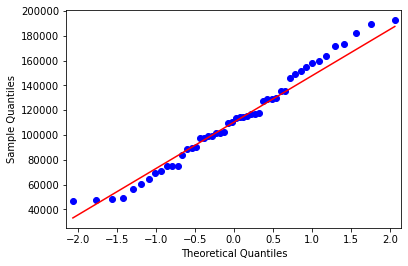

In [22]:
qqplot=sm.qqplot(predict1,line='q')

# Residuals Vs Regressors

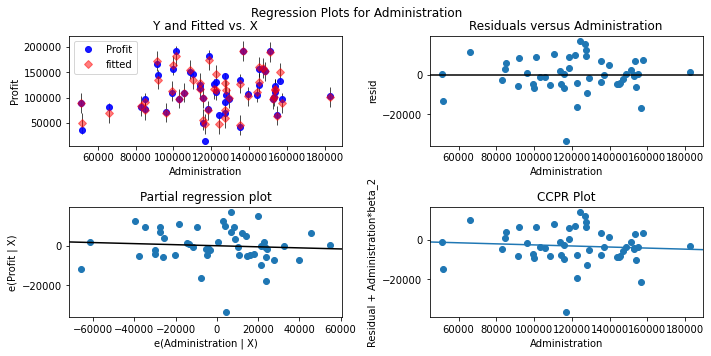

In [23]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model1, "Administration", fig=fig)
plt.show()

# here the p_value of the Administration and Marketing are greater than the 0.05 so we check for the whether if the model develop by cosindering them independantly

In [25]:
# checking for multi colinearity  between Admistration and Marketing spend

In [17]:
model_admin=smf.ols('Profit~Administration',data=data).fit()      

In [18]:
model_admin.pvalues

Intercept         0.003824
Administration    0.162217
dtype: float64

In [ ]:
## here the value of the p for the Administration is greater than the 0.05 so we are omiting the Admistration from the model

In [20]:
model_mark=smf.ols('Profit~Marketing_Spend',data=data).fit()

In [21]:
model_mark.pvalues

Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64

In [22]:
#from the above we can conclude that Admistration  is not significnt as its p value is greater than 0.05

# model2 

In [28]:
model2=smf.ols('Profit~Marketing_Spend+RandD_Spend',data=data).fit()

In [29]:
model2.params

Intercept          46975.864221
Marketing_Spend        0.029908
RandD_Spend            0.796584
dtype: float64

In [30]:
model2.pvalues

Intercept          3.504062e-22
Marketing_Spend    6.003040e-02
RandD_Spend        6.040433e-24
dtype: float64

In [31]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           2.16e-31
Time:                        10:13:05   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
RandD_Spend         0.7966      0.041     19.266      0.000       0.713       0.880
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
## considering only the R&D Spend because the p_value of the marketing spend,Administation is greater than the 0.05 which is insignificant for building a model

In [37]:
model3=smf.ols('Profit~RandD_Spend',data=data).fit()

In [38]:
model3.params

Intercept      49032.899141
RandD_Spend        0.854291
dtype: float64

In [39]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           3.50e-32
Time:                        16:17:56   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RandD_Spend     0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

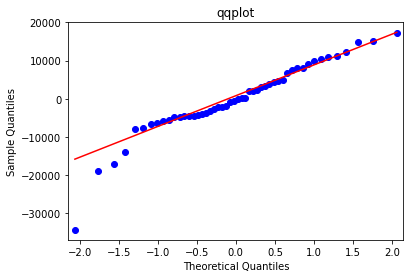

In [68]:
import statsmodels.api as sm
qqplot=smf.qqplot(model3.resid,line='q')
plt.title('qqplot')
plt.show()

In [69]:
list(np.where(model3.resid<-10000))

[array([14, 15, 48, 49], dtype=int64)]

In [70]:
model_influence=model1.get_influence()
(c,_)=model_influence.cooks_distance

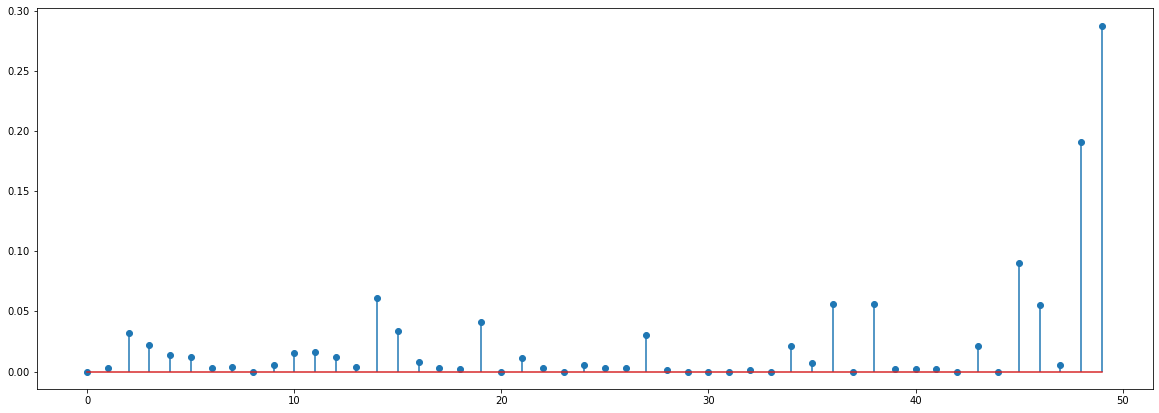

In [71]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.show()

In [72]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

In [73]:
data1=data.drop([48,49],axis=0)
data1

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [78]:
model4=smf.ols('Profit~RandD_Spend',data=data1).fit()


In [79]:
model4.params

Intercept      53117.192419
RandD_Spend        0.814169
dtype: float64

In [80]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     1043.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           2.91e-33
Time:                        17:09:48   Log-Likelihood:                -496.29
No. Observations:                  48   AIC:                             996.6
Df Residuals:                      46   BIC:                             1000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.312e+04   2227.718     23.844      0.000    4.86e+04    5.76e+04
RandD_Spend     0.8142      0.025     32.303      0.000       0.763       0.865
==============================================================================
Omnibus:                        0.068   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.265
Skew:                           0.031   Prob(JB):                        0.876
Kurtosis:                       2.642   Cond. No.                     1.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""